In [84]:
'''
Reunião 25/01/2023

* Melhorar a análise - ok
* Trabalhar com o Jupyter/Colab -ok
* Gráficos/Tabelas - ok
* EDA "básico" para "limpar" () os .csvs gerados pelo nfstream - ?
* Pré-processamento e limpeza de dados - ok

-> Algumas Análises
* Quantos fluxos (linhas) existem para cada protocolo - ok
* Qual o tipo de cada coluna? (dtype) - ok
* Protocolos por porta (esclarecimento necessário) - ok
* Mostrar o número de "erros" (null, nan, tipos errados) por coluna + -
'''

import pandas as pd
import numpy as np
import re as Regex
import socket
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data = pd.read_csv('teste2.csv', sep=',', low_memory=False)
print(data)

          id expiration_id        src_ip            src_mac   src_oui  \
0          0             0  78.26.20.251  38:72:c0:5e:6b:22  38:72:c0   
1          1             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
2          2             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
3          3             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
4          4             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
...      ...           ...           ...                ...       ...   
403761  2658             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
403762  2659             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
403763  2660             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
403764  2661             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   
403765  2662             0     10.0.0.46  78:e4:00:6c:39:cd  78:e4:00   

       src_port          dst_ip            dst_mac   dst_oui dst_port  ...  \
0             0       10.0.0.46  78:e4:00:6c:

In [95]:
data.describe()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
count,403750,403734,403734,403734,403734,403734,403734,403734,403734,403734,...,403734,403734,403734,403734,403734,374100,69622,69367,43612,39783
unique,74547,3,810,17,16,30449,11784,24,14,3396,...,10,192,23,3,7,15928,16,256,12,76
top,0,0,10.0.2.15,08:00:27:a3:83:43,08:00:27,59370,192.168.33.254,52:54:00:12:35:02,52:54:00,53,...,0,DNS,Network,0,6,www.facebook.com,0ffee3ba8e615ad22535e7f771690a28,303951d4c50efb2e991652225a6f02b1,Mozilla/5.0 (X11; Linux x86_64; rv:43.0) Gecko...,image/gif
freq,17,403603,311169,311523,311566,2112,242131,311076,311076,259066,...,273977,166001,264836,379335,378990,4465,34834,8927,22016,5870


In [87]:
# Mostrar o typos de cada coluna
# como todos os tipos estão como string vamos adequar os inteiros

# data[['id','protocol', 'src_port', 'dst_port']] = data[['id','protocol', 'src_port', 'dst_port']].apply(pd.to_numeric, errors='coerce') # errors e um flag da função to_numeric

data = data.astype({'protocol':int, 'src_port':int, 'dst_port':int}, errors='ignore')

print(data.dtypes)

id                       object
expiration_id            object
src_ip                   object
src_mac                  object
src_oui                  object
                          ...  
requested_server_name    object
client_fingerprint       object
server_fingerprint       object
user_agent               object
content_type             object
Length: 86, dtype: object


In [88]:
# https://www.ibm.com/docs/pt-br/ts4500-tape-library?topic=functionality-ipv4-ipv6-address-formats

def is_valid_ip(ip):
    if type(ip) == str:
        try:
            # Tenta criar um socket com o IPv4 e porta fictícias
            socket.inet_pton(socket.AF_INET, ip)
            # Se chegou aqui, é um endereço IPv4 válido
            return True
        except socket.error:
            pass
        try:
            # Tenta criar um socket com o IPv6 e porta fictícias
            socket.inet_pton(socket.AF_INET6, ip)
            # Se chegou aqui, é um endereço IPv6 válido
            return True
        except socket.error:
            pass
        # Se chegou aqui, não é um endereço IPv4 nem IPv6 válido
    return False


In [89]:
# textando a função que valida o o ip

for item in data['src_ip']:
    if(not is_valid_ip(item)):
        print(item)


2228141122
2228141122
194228190193
62210137230
92229205157
186249114248
78111186169
194146132131
115140236222
95139120213
94123177231
193206132162
79142203143
86121245243
46200250140
31134235241
212233161179
109189211124
87244196158
79142203161
176214243244
2228141122
nan
nan
src_ip
nan
nan
src_ip
nan
nan
src_ip
54154169202
95101245177
95154251121
95154251121
95154251147
95154251121
54175183234
54175183234
54175183234
54175183234
nan
nan
src_ip
173241240220
173241240220
173241240220
173241240220
173241240220
52207123132
52207123132
207244108217
34251217137
151101112166
151101112166
151101112166
151101112166
95101252144
159253128183
173241240199
173241240143
34251148123
95101252144
173241240212
95101252144
95101252144
93184221193
93184220113
173241240220
173241240143
173241240212
54242242112
54242242112
54242242112
54242242112
54228222178
108161188225
93184220113
173241240220
95100183197
198232125123
151101112207
151101112207
151101112207
151101112207
151101112207
151101112207
204154111

In [94]:
# Verificar quais campos estão nulos, NaN, tipo errado ou vazios
errors = data.isnull() | data.isna() | (data['dst_port'].apply(lambda x: isinstance(x, str) and not x.isnumeric()))

# Contar o número de erros em cada coluna
col_errors = errors.sum()

# Filtrar apenas as colunas com erros
col_errors = col_errors[col_errors != 0]

# Gerar o gráfico de barras
fig, ax = plt.subplots()
col_errors.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Campos Com Erros')
ax.set_xlabel('Coluna')
ax.set_ylabel('Número de Erros')

# Mostrar o gráfico
plt.show()

MemoryError: Unable to allocate 1.19 TiB for an array with shape (403766, 403766) and data type float64

In [91]:
# Pré-processamento e limpeza de dados
# tratando os ip de origem inválidos

new_data = data.drop(data[[not is_valid_ip(item) for item in data['src_ip']]].index)

# tratando os as portas inválidas
new_data = new_data.drop(data[[not is_valid_ip(item) for item in data['dst_ip']]].index)

new_data = new_data.drop(data[[not str.isdigit(item)  for item in data['src_port']]].index)

print(new_data)

KeyError: '[2652, 2653, 2654, 2702, 2703, 2704, 21405, 21406, 21407, 31894, 31895, 31896, 106427, 106428, 106429, 122577, 122578, 122579, 129739, 129740, 129741, 137019, 137020, 137021, 152064, 152065, 152066, 187066, 187067, 187068, 198155, 198156, 198157, 228085, 228086, 228087, 275763, 275764, 275765, 328878, 328879, 328880, 399310, 399311, 399312, 401100, 401101, 401102] not found in axis'

object


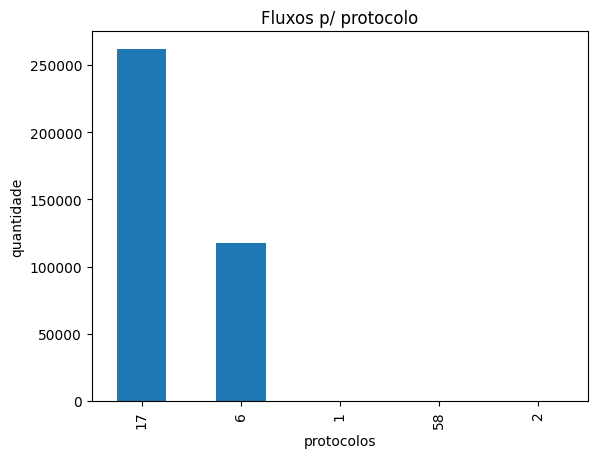

In [ ]:
# Quantos fluxos (linhas) existem para cada protocolo?

# Contar o número de linhas para cada valor na coluna "protocol"
print(data['protocol'].dtype)
counts = data['protocol'].value_counts()

# Gerar o gráfico de barras
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)



# Personalizar o gráfico
ax.set_title('Fluxos p/ protocolo')
ax.set_xlabel('protocolos')
ax.set_ylabel('quantidade')

# Mostrar o gráfico
plt.show()

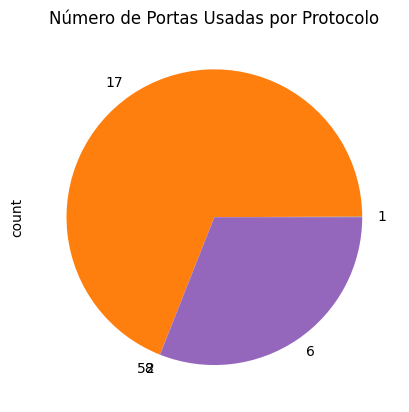

In [ ]:

# Criar um DataFrame de exemplo
# Contar o número de portas usadas por cada protocolo
counts = new_data.groupby(['protocol','dst_port']).size().reset_index(name='count')

# Agrupar as portas por protocolo
grouped = counts.groupby('protocol')['count'].sum()

# Gerar o gráfico de pizza
fig, ax = plt.subplots()
grouped.plot(kind='pie', ax=ax)

# Personalizar o gráfico
ax.set_title('Número de Portas Usadas por Protocolo')

# Mostrar o gráfico
plt.show()


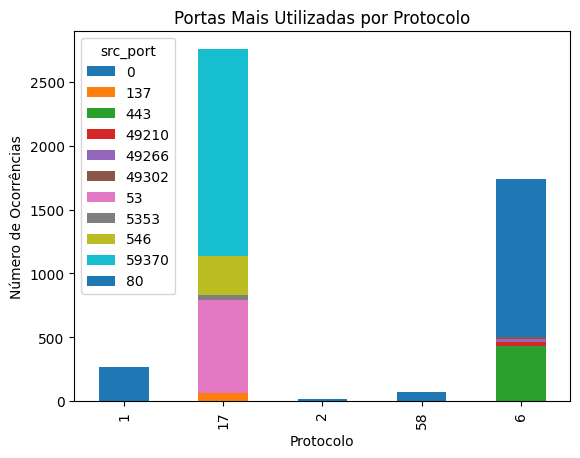

In [ ]:
# Contar o número de vezes que cada porta foi usada para cada protocolo
counts = new_data.groupby(['protocol', 'src_port']).size().reset_index(name='count')

# Ordenar os dados pela contagem decrescente
counts = counts.sort_values(['protocol', 'count'], ascending=[True, False])

# Selecionar as 3 portas mais utilizadas por cada protocolo
top_ports = counts.groupby('protocol').head()

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots()
top_ports.pivot(index='protocol', columns='src_port', values='count').plot(kind='bar', stacked=True, ax=ax)

# Personalizar o gráfico
ax.set_title('Portas Mais Utilizadas por Protocolo')
ax.set_xlabel('Protocolo')
ax.set_ylabel('Número de Ocorrências')

# Mostrar o gráfico
plt.show()